In [431]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Data info

In [432]:
df = pd.read_csv("data.csv")
display(df.shape)
display(df.head())
display(df.info())
display(df.describe())
display(df.nunique())

(1000, 13)

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,"Wiltshire, England Niagara Falls, NY"
1,1,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S,NaN
2,2,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,NaN
3,3,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,NaN
4,4,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,"Greensburg, PA"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        802 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      233 non-null    object 
 11  embarked   998 non-null    object 
 12  home.dest  566 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


None

,ID,survived,pclass,age,sibsp,parch,fare
count,1000.000000,1000.00000,1000.000000,802.000000,1000.000000,1000.00000,999.000000
mean,499.500000,0.39800,2.288000,29.850686,0.496000,0.40200,34.264352
std,288.819436,0.48973,0.840096,14.328743,1.024223,0.91719,53.315077
min,0.000000,0.00000,1.000000,0.166700,0.000000,0.00000,0.000000
25%,249.750000,0.00000,1.750000,21.000000,0.000000,0.00000,7.925000
50%,499.500000,0.00000,3.000000,28.000000,0.000000,0.00000,14.458300
75%,749.250000,1.00000,3.000000,39.000000,1.000000,0.00000,31.275000
max,999.000000,1.00000,3.000000,80.000000,8.000000,9.00000,512.329200


ID           1000
survived        2
pclass          3
name          999
sex             2
age            95
sibsp           7
parch           8
ticket        746
fare          254
cabin         157
embarked        3
home.dest     313
dtype: int64

In [433]:
 df.isnull().sum() 

ID             0
survived       0
pclass         0
name           0
sex            0
age          198
sibsp          0
parch          0
ticket         0
fare           1
cabin        767
embarked       2
home.dest    434
dtype: int64

In [434]:
 df.duplicated().sum()

0

### Data preparation

In [435]:
# checking what data is object
print(df.select_dtypes(['object']).columns)
df.select_dtypes(['object']).nunique()

Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'home.dest'], dtype='object')


name         999
sex            2
ticket       746
cabin        157
embarked       3
home.dest    313
dtype: int64

In [436]:
#changing object type to category
df[df.select_dtypes(['object']).columns] =df.select_dtypes(['object']).astype('category')


In [437]:
# making the data of the category type into a number type
df[df.select_dtypes(['category']).columns] = df.select_dtypes(['category']).apply(lambda x: x.cat.codes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   int16  
 4   sex        1000 non-null   int8   
 5   age        802 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   int16  
 9   fare       999 non-null    float64
 10  cabin      1000 non-null   int16  
 11  embarked   1000 non-null   int8   
 12  home.dest  1000 non-null   int16  
dtypes: float64(2), int16(4), int64(5), int8(2)
memory usage: 64.6 KB


In [438]:
df.head()

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,3,346,1,11.0,5,2,617,46.9000,-1,2,304
1,1,0,3,448,1,NaN,0,0,698,7.0500,-1,2,-1
2,2,0,3,836,1,4.0,3,2,378,27.9000,-1,2,-1
3,3,1,3,668,0,NaN,1,0,506,15.5000,-1,1,-1
4,4,1,3,6,0,18.0,0,0,207,7.2292,-1,0,114


In [439]:
df.isnull().sum()

ID             0
survived       0
pclass         0
name           0
sex            0
age          198
sibsp          0
parch          0
ticket         0
fare           1
cabin          0
embarked       0
home.dest      0
dtype: int64

In [440]:
# replacing NaN with -1
df['age'].replace(np.nan, "-1", inplace=True)

In [441]:
df['fare'].replace(np.nan, "-1", inplace=True)

## Decision Tree

In [442]:
# Decision Tree Classifiers is well suited to solve this problem because we need to predict a variable that is categorical (0/1), which is what this type of model does.

### Preparing training, testing and validation sets for decision tree

In [443]:
xdf = df.drop("survived", axis = 1) #creating data on the basis of which we will predict the value of the variable
ydf = df.survived #creating the variable we want to predict

In [444]:
rd_seed = 245
#randomly splitting data to testing data and traning data 60/40
xtrain, xtest, ytrain, ytest = train_test_split(xdf, ydf, test_size=0.4, random_state=rd_seed) 
display(xtrain.shape)
display(ytrain.shape)
display(xtest.shape)
display(ytest.shape)

(600, 12)

(600,)

(400, 12)

(400,)

In [445]:
# splitting testing data to tasting and validating 40 to 50/50 
xval, xtest, yval, ytest = train_test_split(xtest, ytest, test_size=0.5, random_state=rd_seed) 
display(xval.shape)
display(yval.shape)
display(xtest.shape)
display(ytest.shape)

(200, 12)

(200,)

(200, 12)

(200,)

### Training model

In [446]:
clf = DecisionTreeClassifier(max_depth=50)
clf.get_params() 
#making a classifier for training

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [447]:
clf.fit(xtrain, ytrain) #the model is training on training data

DecisionTreeClassifier(max_depth=50)

In [448]:
ypredicted = clf.predict(xtrain) #predicting labels for training data using the trained classifier.

In [449]:
(ytrain - ypredicted).value_counts(normalize=True) #counts relative differences between actual and predicted training labels.

0    1.0
Name: survived, dtype: float64

In [450]:
#accuracy for training data
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, clf.predict(xtrain))))

accuracy score (train): 1.000000


In [451]:
#accuracy for validation data
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(xval))))

accuracy score (test): 0.735000


### Hyperparameter setting

In [452]:
#code from lectures with comments

param_grid = {
    'max_depth': range(1,30), 
    'criterion': ['entropy', 'gini']
} #parametrs and their variations
param_comb = ParameterGrid(param_grid) #creates all combinations of parameters from a given parameter grid

val_acc = []
train_acc = []
for params in param_comb:
    clf = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion']) #iterates over parameter combinations
    clf.fit(xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, clf.predict(xtrain))) #compares the predictions with the data and adds the accuracy (proportion of correct predictions) to the list.
    val_acc.append(metrics.accuracy_score(yval, clf.predict(xval)))#same as train_acc


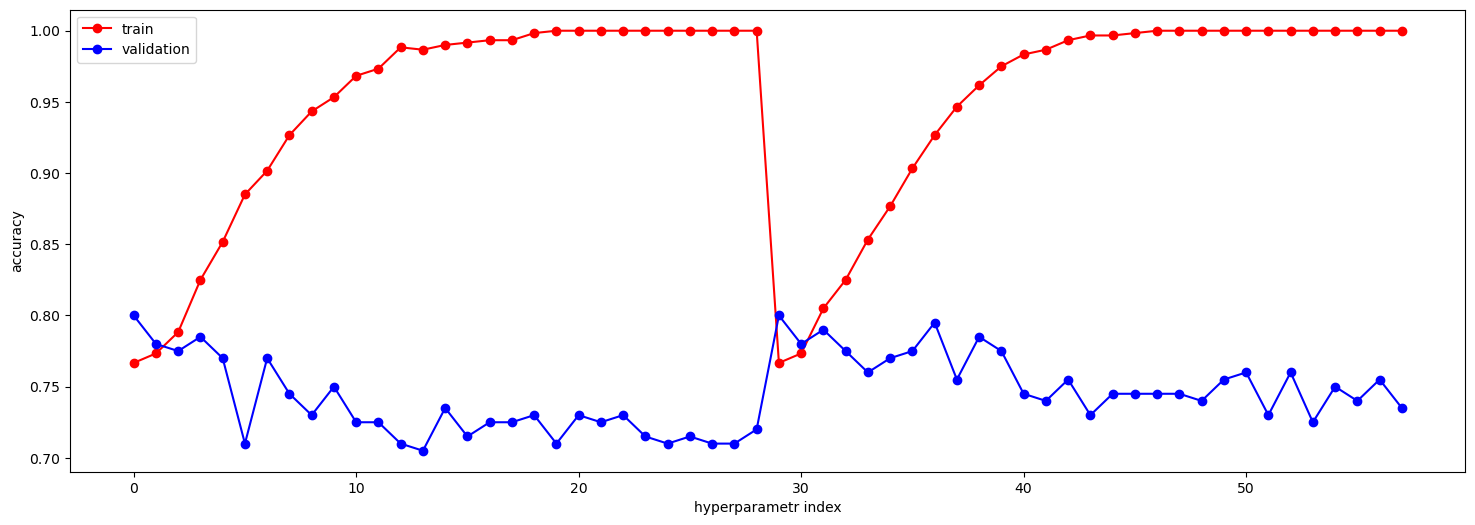

In [453]:
plt.figure(figsize=(18,6))
plt.plot(train_acc,'or-')
plt.plot(val_acc,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [454]:
# choosing the best combination of parametrs, meaning returns index of the best working combination(with highest accuracy)
best_params = param_comb[np.argmax(val_acc)] 
best_params

{'max_depth': 1, 'criterion': 'entropy'}

In [455]:
clf = DecisionTreeClassifier(**best_params) #unpacking dictionary and putting info into DecisionTreeClassifier 
clf.fit(xtrain, ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, clf.predict(xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(xval))))


accuracy score (train): 0.766667
accuracy score (validation): 0.800000


### F1 score, the ROC curve and the AUC.

In [456]:
ypred = clf.predict(xval) #predict labels for val data
f1_score = metrics.f1_score(yval, ypred)
print(f"F1 Score: {f1_score}")
#F1 score is a measure of a model's accuracy, combining precision and recall

F1 Score: 0.7435897435897436


In [457]:
y_predict_proba = clf.predict_proba(xval)[:,1] #class 1 probabilities
print(y_predict_proba)

[0.2        0.2        0.70697674 0.2        0.2        0.2
 0.70697674 0.2        0.2        0.2        0.70697674 0.70697674
 0.2        0.2        0.70697674 0.2        0.2        0.2
 0.2        0.2        0.2        0.2        0.2        0.70697674
 0.70697674 0.2        0.2        0.2        0.2        0.2
 0.2        0.2        0.70697674 0.2        0.70697674 0.70697674
 0.70697674 0.2        0.2        0.70697674 0.2        0.2
 0.2        0.2        0.2        0.70697674 0.2        0.2
 0.70697674 0.70697674 0.2        0.2        0.70697674 0.2
 0.70697674 0.2        0.70697674 0.70697674 0.70697674 0.2
 0.2        0.2        0.70697674 0.2        0.2        0.2
 0.70697674 0.2        0.2        0.70697674 0.70697674 0.2
 0.70697674 0.70697674 0.2        0.2        0.2        0.70697674
 0.2        0.2        0.2        0.70697674 0.70697674 0.2
 0.70697674 0.2        0.2        0.70697674 0.2        0.2
 0.70697674 0.2        0.70697674 0.2        0.2        0.2
 0.70697674 

In [458]:
fpr, tpr, thresholds = metrics.roc_curve(yval, y_predict_proba)# fpr contains fals positive results, tpr - true positive, thresholdas - thresholds values 
auc = metrics.roc_auc_score(yval, y_predict_proba)#calculating the area under the receiver performance curve

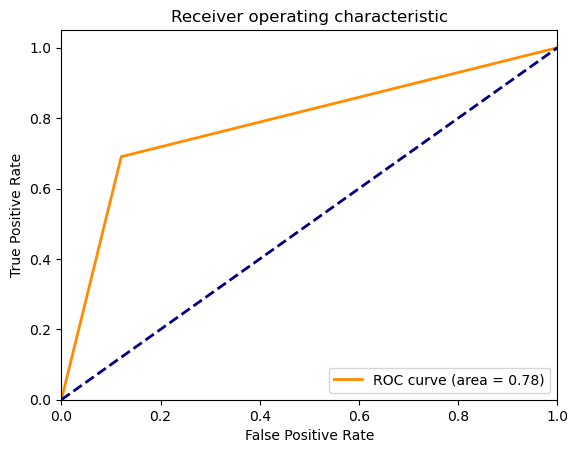

In [459]:
plt.figure() #shows the relationship between the proportion of True Positive Rate (TPR) and the proportion of False Positive Rate (FPR) at all possible thresholds.
plt.plot(fpr, tpr, color="darkorange", lw=2, label = f"ROC curve (area = {auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## K-nearest neighbors

In [460]:
#This type of model is suitable for this assignment because we do not have a large dataset and we have non-lenient relationships between catigories, but we have many attributes and the Knn is sensitive to scaling.

In [461]:
#Creating and training a knn model
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(xtrain, ytrain)
print(f"Validation accuracy: {metrics.accuracy_score(yval, knn.predict(xval)):0.4f}")

Validation accuracy: 0.6300


### Normalization

In [462]:
#Creating and training a knn model with min-max normilized data
scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xval_scaled = scaler.transform(xval)
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(xtrain_scaled, ytrain)

print(f"Validation accuracy of normalized model: {knn.score(xval_scaled, yval):0.4f}")

Validation accuracy of normalized model: 0.8050


In [463]:
# from sklearn.preprocessing import StandardScaler

In [464]:
#Creating and training a knn model with standardisated data
#We can see that this type of normalization is less productive (0.7500)
# scaler = StandardScaler()
# xtrain_scaled = scaler.fit_transform(xtrain)
# xval_scaled = scaler.transform(xval)
# knn = KNeighborsClassifier(n_neighbors = 11)
# knn.fit(xtrain_scaled, ytrain)
# print(f"Validation accuracy of normalized model: {knn.score(xval_scaled, yval):0.4f}")

In [465]:
val_acc = []
train_acc = []
kneighbors = range(3,17)
for k in kneighbors:
    knn = KNeighborsClassifier(n_neighbors = k) # Iterate over each value of 'k' and create knn with the value
    knn.fit(xtrain_scaled, ytrain)
    val_acc.append(knn.score(xval_scaled, yval)) # Evaluate the classifier on the scaled validation data and append the score to the val_acc list
    train_acc.append(knn.score(xtrain_scaled, ytrain)) #same as val

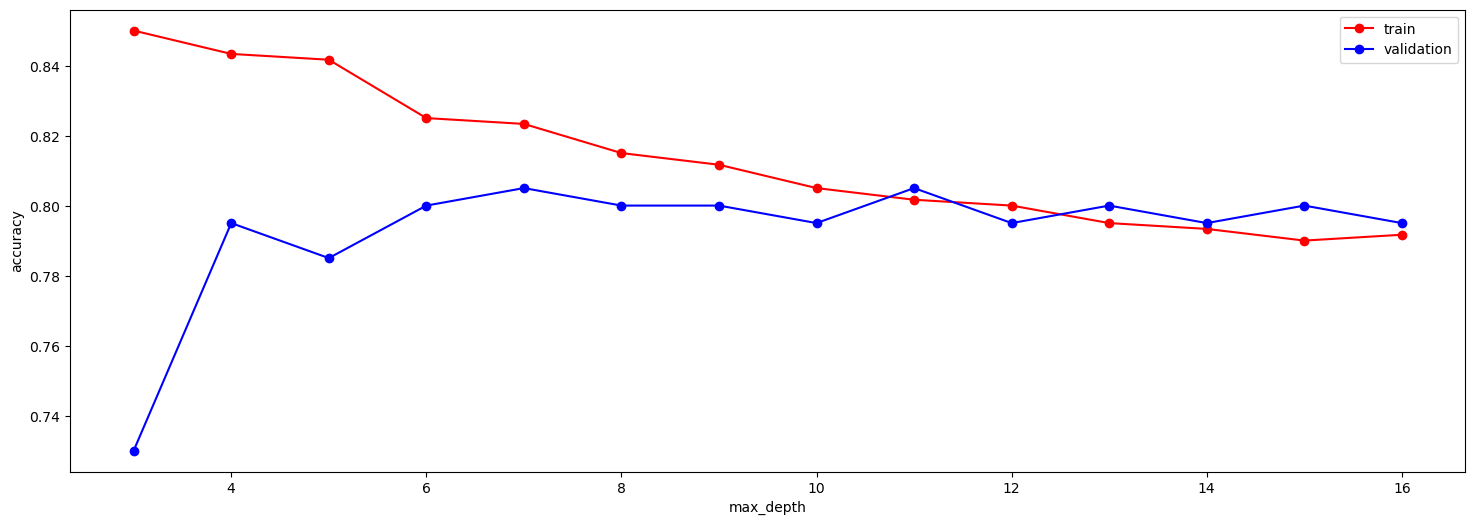

In [466]:


plt.figure(figsize=(18,6))
plt.plot(kneighbors, train_acc,'or-') 
plt.plot(kneighbors, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [467]:
# best parametrs that we have here are not actually best,
#best n_neighbors is 11, we can see it from the graph, then accuracy is 0.8050

# from sklearn.model_selection import cross_val_score
# param_grid = {
#     'n_neighbors': range(1, 15)
# }

# param_comb = ParameterGrid(param_grid)

# val_metric = []
# for params in param_comb:
#     knn = KNeighborsClassifier(**params)
#     # cross validation
#     fold_acc = cross_val_score(knn, xtrain, ytrain, cv=5)
#     val_metric.append(np.mean(fold_acc))
    
# best_knn_params = param_comb[np.argmax(val_metric)]
# best_knn_metric = max(val_metric)
# print(f"Našli jsme nejlepší hyperparametry {best_knn_params} s kross validační přesností {best_knn_metric:.4f}.")




In [468]:
# best_knn = KNeighborsClassifier(**best_knn_params)
# best_knn.fit(xtrain, ytrain)
# val_accuracy = best_knn.score(xval, yval)
# print(f"Accuracy: {val_accuracy:.4f}")

### F1 score, the ROC curve and the AUC.

In [469]:
ypred = knn.predict(xval_scaled ) #predict labels for val data
f1_score = metrics.f1_score(yval, ypred)
print(f"F1 Score: {f1_score}")

F1 Score: 0.7092198581560283


In [470]:
y_predict_proba = knn.predict_proba(xval_scaled)[:,1] #class 1 probabilities
print(y_predict_proba)

[0.5    0.0625 0.75   0.0625 0.125  0.125  0.5625 0.1875 0.     0.0625
 0.4375 0.1875 0.125  0.0625 0.875  0.1875 0.0625 0.1875 0.     0.1875
 0.25   0.0625 0.25   0.3125 0.5    0.25   0.0625 0.125  0.5    0.375
 0.25   0.125  0.875  0.1875 0.8125 0.8125 0.75   0.25   0.     0.875
 0.3125 0.125  0.0625 0.3125 0.0625 0.4375 0.     0.375  1.     0.9375
 0.125  0.125  0.9375 0.5625 0.9375 0.0625 0.5    0.5    0.9375 0.25
 0.25   0.375  0.375  0.25   0.0625 0.4375 1.     0.25   0.125  1.
 0.6875 0.25   1.     0.8125 0.5    0.25   0.     0.3125 0.     0.3125
 0.0625 0.375  0.75   0.125  0.375  0.3125 0.125  0.4375 0.4375 0.25
 0.8125 0.125  0.9375 0.3125 0.     0.125  1.     0.     0.     0.0625
 0.125  0.9375 0.5    0.625  1.     0.3125 0.75   0.375  0.25   0.
 0.5    1.     0.0625 0.375  1.     1.     0.     0.4375 0.6875 0.1875
 1.     0.4375 0.3125 0.25   0.125  0.1875 0.125  0.0625 0.25   0.8125
 0.125  0.3125 0.0625 0.8125 0.625  0.6875 1.     0.1875 0.1875 0.8125
 0.1875 0.125  0.937

In [471]:
fpr, tpr, thresholds = metrics.roc_curve(yval, y_predict_proba)# fpr contains fals positive results, tpr - true positive, thresholdas - thresholds values 
auc = metrics.roc_auc_score(yval, y_predict_proba)#calculating the area under the receiver performance curve

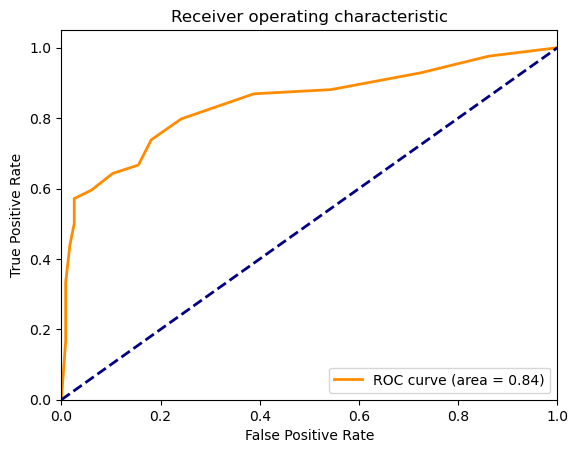

In [472]:
plt.figure() #shows the relationship between the proportion of True Positive Rate (TPR) and the proportion of False Positive Rate (FPR) at all possible thresholds.
plt.plot(fpr, tpr, color="darkorange", lw=2, label = f"ROC curve (area = {auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

For first model we have F1 = 0.74, auc = 0.78 ; for the second one F1 =0.71, auc = 0.84, also roc curve for seckond model is more convinient, so because of much higher auc and better roc curve i will choose the second model as final.

### Checking with test data

In [473]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(xtrain_scaled, ytrain)
xtest_scaled = scaler.transform(xtest)

print(f"Validation accuracy of normalized model(val): {knn.score(xval_scaled, yval):0.4f}")
print(f"Validation accuracy of normalized model(test): {knn.score(xtest_scaled, ytest):0.4f}")

Validation accuracy of normalized model(val): 0.8050
Validation accuracy of normalized model(test): 0.8000


In [474]:
xtest_scaled = scaler.transform(xtest)
ypred = knn.predict(xtest_scaled)
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))
#we can see that model is able to predict truly up to 80% labels. 
#The model is better at predicting class 0 (non-survivors) with higher completeness (recall), but also does well with class 1 (survivors) in terms of precision (accuracy).

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       115
           1       0.81      0.69      0.75        85

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200

[[101  14]
 [ 26  59]]


### Evaluation

In [475]:
df1 = pd.read_csv("evaluation.csv")

In [476]:
df1.head()

,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1000,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C,NaN
1,1001,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,"New York, NY"
2,1002,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S,"New York, NY"
3,1003,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,NaN
4,1004,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,NaN


### Preparation

In [477]:
df1[df1.select_dtypes(['object']).columns] =df1.select_dtypes(['object']).astype('category')


In [478]:
df1[df1.select_dtypes(['category']).columns] = df1.select_dtypes(['category']).apply(lambda x: x.cat.codes)

In [479]:
df1.head()

,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1000,3,270,1,33.0,0,0,155,8.6625,-1,0,-1
1,1001,1,95,0,NaN,0,0,245,31.6833,-1,2,78
2,1002,1,102,0,NaN,1,0,251,133.6500,-1,2,78
3,1003,3,287,1,47.0,0,0,121,9.0000,-1,2,-1
4,1004,1,178,0,58.0,0,0,240,146.5208,11,0,-1


In [480]:
df1.isnull().sum()

ID            0
pclass        0
name          0
sex           0
age          65
sibsp         0
parch         0
ticket        0
fare          0
cabin         0
embarked      0
home.dest     0
dtype: int64

In [481]:
df1['age'].replace(np.nan, "-1", inplace=True)

### Testing

In [482]:
df1_scaled = scaler.transform(df1)

In [483]:
df1_predictions = knn.predict(df1_scaled)

In [484]:
results_df = pd.DataFrame({
    'ID': df1['ID'],
    'survived': df1_predictions
})


In [485]:
results_df.to_csv('results.csv', index=False)


In [486]:
results_df.head()

,ID,survived
0,1000,0
1,1001,1
2,1002,1
3,1003,0
4,1004,1
